<a href="https://colab.research.google.com/github/Mcdum22/MADT8101-Nicha/blob/main/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Voice of Customer Analytics**

The technique involves actively engaging in the process of attentively listening to the product experiences shared by customers, garnered through diverse means such as interviews, surveys or social medias. By delving into these customer insights, companies can effectively collect a profound comprehension of the expectations that individuals hold for their products and services. This in-depth understanding then serves as a foundational cornerstone upon which businesses can design and tailor their services to harmonize with these articulated expectations. As a testament to the growing significance of this approach, a multitude of brands have embarked on the journey of establishing Voice of Customer (VOC) programs. These programs function as structured avenues through which companies can amass critical insights and feedback directly from their customer base. The goal is to harness these insights to iteratively refine and enhance the overall customer experience, culminating in a more gratifying and customer-centric product and service ecosystem.

# **Social Listening for Voice of Customer Analytics**

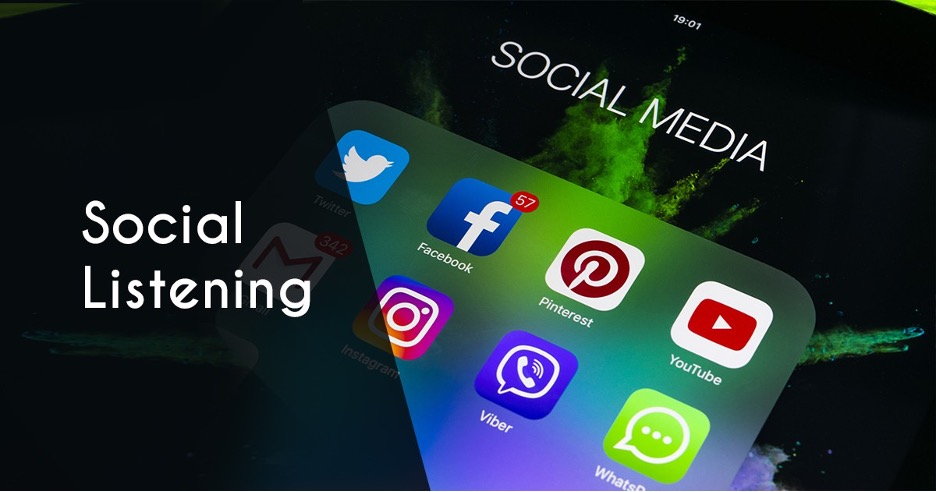

By leveraging platforms such as Twitter, Facebook, LinkedIn, and Instagram, you're afforded the discreet privilege of unobtrusively observing the manifold dialogues transpiring among customers. This surveillance, akin to a covert mission, serves as an invaluable means of thoroughly researching your target audience. Picture it as a form of observation that's akin to a beneficial form of "spying." The act of lurking amidst the digital discourse on social media engenders a profound and comprehensive comprehension of the preferences, aversions, interactions, and inclinations that shape your customers' digital personas. The culmination of this observation contributes to the continuous refinement of customer experiences, facilitating an iterative process that aligns seamlessly with customer preferences. In this symbiotic dance of insights, the outcomes are mutually advantageous, cultivating an environment where both your enterprise and its cherished clientele reap the rewards of this discerning form of digital reconnaissance.

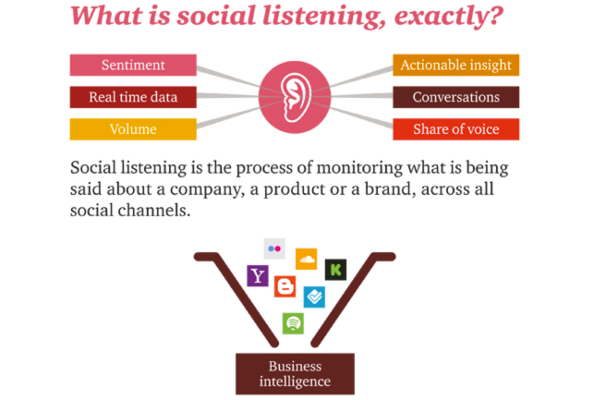

# **Social Listening for NGOs**

Data from human rights movement are in the form of narrative and qualitative. Social listening is one technique to understand the data. NGOs benefit from social listening in several reasons.



*   **Understanding Public Perception**: Social listening enables NGOs to gain insights into how the public perceives their organization and the causes they champion. This understanding helps them assess their reputation and address any misconceptions or negative sentiment.

*   **Monitoring Advocacy Impact**: NGOs often engage in advocacy and awareness campaigns. Social listening allows them to track the reach, resonance, and impact of these campaigns by analyzing how discussions and sentiments change around the issues they're advocating for.

*   **Identifying Emerging Issues**: Social listening helps NGOs stay attuned to emerging issues and trends within their focus areas. By identifying new challenges or concerns, NGOs can adjust their strategies and priorities to remain relevant and effective.
*   **Tailoring Messaging**: Through social listening, NGOs can gain a deeper understanding of the language, terms, and narratives that resonate with their target audience. This knowledge allows them to craft more impactful and relatable messages.

# **WORKSHOP**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install pyLDAvis

In [ ]:
import gensim
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
!pip install --upgrade pythainlp

In [ ]:
import pythainlp

In [ ]:
df = pd.read_csv('/content/AAA.csv')

In [ ]:
df.tail()

,ID,Comment
5,6,ที่แน่ๆเลยคือ ขัดกับหลักศาสนาบางศาสนา\n\nอีกส่...
6,7,พรบ คู่ชีวิต ผ่านแล้วนะครับ\n\nสมรสเท่าเทียม เ...
7,8,เท่าที่ดูมา ผมมองว่าพระราชบัญญัติคู่ชีวิตจะต...
8,9,ส่วนตัวเห็นว่ากับเพศที่สาม พรบ คู่ชีวิต รัดกุม...
9,10,ไม่ค่อยเข้าใจเรื่องพวกนี้แต่รู้สึกว่ามันสลับซั...


**TOKENIZE**

In [ ]:
stopwords = list(pythainlp.corpus.thai_stopwords())

In [ ]:
removed_words = ['',' ','  ','\n','ท่าน', '(', ')','แก่','ส่วนตัว']

In [ ]:
screening_words = stopwords + removed_words

In [ ]:
def tokenize_with_space(sentence):
  merged = ''
  words = pythainlp.word_tokenize(str(sentence), engine='newmm')
  for word in words:
    if word not in screening_words:
      merged = merged + ',' + word
  return merged[1:]

In [ ]:
df['Comment_token'] = df['Comment'].apply(lambda x: tokenize_with_space(x))

In [ ]:
df.head()

,ID,Comment,Comment_token
0,1,ขัดหลักศาสนา คริสต์ อิสลามมั้ง,"ขัด,หลักศาสนา,คริสต์,อิสลาม,มั้ง"
1,2,รัฐ ขาดรายได้เพราะไม่ผลิตลูก,"รัฐ,รายได้,ผลิต,ลูก"
2,3,ขัดกับหลักกฎหมายครับคนรอบครัวครัว และยากมากๆที...,"ขัด,หลักกฎหมาย,คน,รอบ,ครัว,ครัว,ที่จะ,พาดพิง,เ..."
3,4,มันอาจจะทำให้อัตราการเกิดลดลงเร็วกว่าที่เป็นอย...,"อัตรา,ลดลง,เป็นอยู่,ขัดต่อ,หลักศาสนา,ธรรมชาติ,..."
4,5,เท่าที่เห็นหลักๆ ก็เรื่องขัดหลักศาสนา กับความเ...,"หลัก,เรื่อง,ขัด,หลักศาสนา,ความเชื่อ,เก่าๆ,คนรุ..."


In [ ]:
df.tail()

,ID,Comment,Comment_token
5,6,ที่แน่ๆเลยคือ ขัดกับหลักศาสนาบางศาสนา\n\nอีกส่...,"แน่ๆ,ขัด,หลักศาสนา,ศาสนา,เพื่อน,ทนาย,เล่า,วิธี..."
6,7,พรบ คู่ชีวิต ผ่านแล้วนะครับ\n\nสมรสเท่าเทียม เ...,"พร,บ,คู่ชีวิต,สมรส,เท่าเทียม,วาทะ,กรรม,แก้,ชาย..."
7,8,เท่าที่ดูมา ผมมองว่าพระราชบัญญัติคู่ชีวิตจะต...,"ดู, ผม,พระราชบัญญัติ,คู่ชีวิต,ใช้งาน, ,พระ..."
8,9,ส่วนตัวเห็นว่ากับเพศที่สาม พรบ คู่ชีวิต รัดกุม...,"เพศ,ที่สาม,พร,บ,คู่ชีวิต,รัดกุม,เหมาะสม,สมรส,เ..."
9,10,ไม่ค่อยเข้าใจเรื่องพวกนี้แต่รู้สึกว่ามันสลับซั...,"เรื่อง,รู้สึก,สลับซับซ้อน,ยุ่งเหยิง,อีนุงตุงนั..."


**CREATE DICTIONARY**

In [ ]:
documents = df['Comment_token'].to_list()
texts = [[text for text in doc.split(',')] for doc in documents]
dictionary = gensim.corpora.Dictionary(texts)

In [ ]:
print(dictionary.token2id.keys())

dict_keys(['ขัด', 'คริสต์', 'มั้ง', 'หลักศาสนา', 'อิสลาม', 'ผลิต', 'รัฐ', 'รายได้', 'ลูก', 'คน', 'ครัว', 'ตัวบท', 'ที่จะ', 'พาดพิง', 'รอบ', 'หลักกฎหมาย', 'เรื่อง', 'ขัดต่อ', 'ชีวิตคู่', 'ตามมา', 'ธรรมชาติ', 'บางอย่าง', 'ปกติ', 'ผลเสีย', 'มนุษย์', 'ลดลง', 'สมรส', 'สังคม', 'อยู่แล้ว', 'อัตรา', 'เท่าเทียม', 'เป็นอยู่', 'เสรี', 'ในอนาคต', 'คนรุ่นก่อน', 'ความเชื่อ', 'หลัก', 'เก่าๆ', 'กฏ', 'กระทบ', 'การนิยาม', 'ชัดเจน', 'ดู', 'ต่างกัน', 'ทนาย', 'ทั่วไป', 'ที่สาม', 'นิยาม', 'บางส่วน', 'บาน', 'บุคคล', 'ประหลาด', 'พิธีกรรม', 'มีบทบาท', 'ล่ะ', 'วิธีการ', 'ศาสนา', 'หมาย', 'เก่า', 'เปลี่ยนเป็น', 'เพศ', 'เพศชาย', 'เพศหญิง', 'เพี้ยน', 'เพื่อน', 'เล่า', 'เหมือน', 'แก้', 'แต่งงาน', 'แน่ๆ', 'แยก', 'โบราณ', 'ไม่ต้อง', 'ไล่', '2', 'กฎหมาย', 'กรรม', 'ความจริง', 'คู่ชีวิต', 'จุด', 'ชาย', 'ตามกฎหมาย', 'ทั้งคู่', 'ทำ', 'ท้อง', 'บ', 'พร', 'พ่อแม่', 'มีปัญหา', 'ยกตัวอย่าง', 'วาทะ', 'หญิง', 'ออกกฎหมาย', 'เดิม', 'แบบนี้', '\xa0\xa0\xa0', '\xa0\xa0\xa0ผม', 'ความเป็นจริง', 'ตั้งอยู่', 'พระราชบัญญัติ', 'สวย', 'แนว'

In [ ]:
gensim_corpus = [dictionary.doc2bow(text, allow_update=True) for text in texts]
word_frequencies = [[(dictionary[id], frequence) for id, frequence in couple] for couple in gensim_corpus]

**TOPIC MODELING**

In [ ]:
num_topics = 4
chunksize = 4000
passes = 20
iterations = 50
eval_every = 1

temp = dictionary[0]
id2word = dictionary.id2token

model = gensim.models.LdaModel(corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, \
                              alpha='auto', eta='auto', \
                              iterations=iterations, num_topics=num_topics, \
                              passes=passes, eval_every=eval_every)

In [ ]:
vis = pyLDAvis.gensim.prepare(model, gensim_corpus, dictionary, mds='mmds')
vis

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.100176 -0.064843       1        1  57.377088
3     -0.114089  0.015931       2        1  35.317681
0      0.017930  0.055845       3        1   7.228961
2     -0.004016 -0.006933       4        1   0.076271, topic_info=       Term      Freq     Total Category  logprob  loglift
16   เรื่อง  3.000000  3.000000  Default  30.0000  30.0000
0       ขัด  2.000000  2.000000  Default  29.0000  29.0000
91     หญิง  5.000000  5.000000  Default  28.0000  28.0000
67      แก้  5.000000  5.000000  Default  27.0000  27.0000
9        คน  5.000000  5.000000  Default  26.0000  26.0000
..      ...       ...       ...      ...      ...      ...
114       %  0.001142  1.797650   Topic4  -5.0562  -0.1831
56    ศาสนา  0.001142  2.571458   Topic4  -5.0562  -0.5411
120   LGBTQ  0.001142  2.476593   Topic4  -5.0562  -0.5035
116     100  0.001142  1.797657   Topic4  -5.0562  -0.1831
118     200  0.001142  1.797655   Topic4  -5.0562  -0.1831

[190 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
114       2  1.112564         %
115       2  0.807575         -
104       1  0.528389        10
104       2  0.528389        10
116       2  1.112559       100
...     ...       ...       ...
113       1  0.528387    แล้วก็
113       2  0.528387    แล้วก็
155       2  0.893867  โครโมโซม
33        2  0.893922   ในอนาคต
156       2  0.893868       ไทย

[112 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

**TOPIC PREDICTION**

In [ ]:
model.show_topic(1)

[('หญิง', 0.03586901),
 ('แก้', 0.03586788),
 ('สมรส', 0.030130025),
 ('คน', 0.030129904),
 ('คู่ชีวิต', 0.024390865),
 ('เท่าเทียม', 0.024390664),
 ('เพศ', 0.024390139),
 ('พร', 0.018651817),
 ('บ', 0.018651817),
 ('บุคคล', 0.018651403)]

In [ ]:
df['topics'] = df['Comment_token'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['Comment_token'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])

In [ ]:
print(df)

   ID                                            Comment  \
0   1                     ขัดหลักศาสนา คริสต์ อิสลามมั้ง   
1   2                       รัฐ ขาดรายได้เพราะไม่ผลิตลูก   
2   3  ขัดกับหลักกฎหมายครับคนรอบครัวครัว และยากมากๆที...   
3   4  มันอาจจะทำให้อัตราการเกิดลดลงเร็วกว่าที่เป็นอย...   
4   5  เท่าที่เห็นหลักๆ ก็เรื่องขัดหลักศาสนา กับความเ...   
5   6  ที่แน่ๆเลยคือ ขัดกับหลักศาสนาบางศาสนา\n\nอีกส่...   
6   7  พรบ คู่ชีวิต ผ่านแล้วนะครับ\n\nสมรสเท่าเทียม เ...   
7   8  เท่าที่ดูมา   ผมมองว่าพระราชบัญญัติคู่ชีวิตจะต...   
8   9  ส่วนตัวเห็นว่ากับเพศที่สาม พรบ คู่ชีวิต รัดกุม...   
9  10  ไม่ค่อยเข้าใจเรื่องพวกนี้แต่รู้สึกว่ามันสลับซั...   

                                       Comment_token  topics     score  
0                   ขัด,หลักศาสนา,คริสต์,อิสลาม,มั้ง       1  0.981041  
1                                รัฐ,รายได้,ผลิต,ลูก       1  0.976532  
2  ขัด,หลักกฎหมาย,คน,รอบ,ครัว,ครัว,ที่จะ,พาดพิง,เ...       0  0.983835  
3  อัตรา,ลดลง,เป็นอยู่,ขัดต่อ,หลักศาสนา,ธรรมชาต

In [ ]:
df.head()

,ID,Comment,Comment_token,topics,score
0,1,ขัดหลักศาสนา คริสต์ อิสลามมั้ง,"ขัด,หลักศาสนา,คริสต์,อิสลาม,มั้ง",1,0.981041
1,2,รัฐ ขาดรายได้เพราะไม่ผลิตลูก,"รัฐ,รายได้,ผลิต,ลูก",1,0.976532
2,3,ขัดกับหลักกฎหมายครับคนรอบครัวครัว และยากมากๆที...,"ขัด,หลักกฎหมาย,คน,รอบ,ครัว,ครัว,ที่จะ,พาดพิง,เ...",0,0.983835
3,4,มันอาจจะทำให้อัตราการเกิดลดลงเร็วกว่าที่เป็นอย...,"อัตรา,ลดลง,เป็นอยู่,ขัดต่อ,หลักศาสนา,ธรรมชาติ,...",3,0.991913
4,5,เท่าที่เห็นหลักๆ ก็เรื่องขัดหลักศาสนา กับความเ...,"หลัก,เรื่อง,ขัด,หลักศาสนา,ความเชื่อ,เก่าๆ,คนรุ...",0,0.977103


In [ ]:
df.tail()

,ID,Comment,Comment_token,topics,score
5,6,ที่แน่ๆเลยคือ ขัดกับหลักศาสนาบางศาสนา\n\nอีกส่...,"แน่ๆ,ขัด,หลักศาสนา,ศาสนา,เพื่อน,ทนาย,เล่า,วิธี...",1,0.997953
6,7,พรบ คู่ชีวิต ผ่านแล้วนะครับ\n\nสมรสเท่าเทียม เ...,"พร,บ,คู่ชีวิต,สมรส,เท่าเทียม,วาทะ,กรรม,แก้,ชาย...",1,0.997662
7,8,เท่าที่ดูมา ผมมองว่าพระราชบัญญัติคู่ชีวิตจะต...,"ดู, ผม,พระราชบัญญัติ,คู่ชีวิต,ใช้งาน, ,พระ...",1,0.993054
8,9,ส่วนตัวเห็นว่ากับเพศที่สาม พรบ คู่ชีวิต รัดกุม...,"เพศ,ที่สาม,พร,บ,คู่ชีวิต,รัดกุม,เหมาะสม,สมรส,เ...",1,0.995556
9,10,ไม่ค่อยเข้าใจเรื่องพวกนี้แต่รู้สึกว่ามันสลับซั...,"เรื่อง,รู้สึก,สลับซับซ้อน,ยุ่งเหยิง,อีนุงตุงนั...",3,0.997415
